In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

C:\Users\Mariam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.random.seed(42) 
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.5, size=X.shape[0])

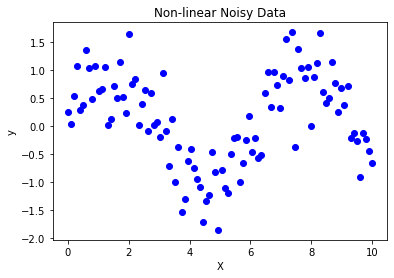

In [3]:
plt.scatter(X, y, color='blue', label='Noisy data')
plt.title("Non-linear Noisy Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**Logistic Regression**

In [4]:
y_binary = (y > 0).astype(int)  
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1] 

In [6]:
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
print(f"Accuracy train: {accuracy_score(y_train, y_pred_train):.2f}")

Logistic Regression Performance:
Accuracy: 0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.54      0.50      0.52        14

    accuracy                           0.35        20
   macro avg       0.27      0.25      0.26        20
weighted avg       0.38      0.35      0.36        20

Accuracy train: 0.46


In [7]:
X_range = np.linspace(0, 10, 300).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_range)[:, 1]
y_pred = log_reg.predict(X_test)

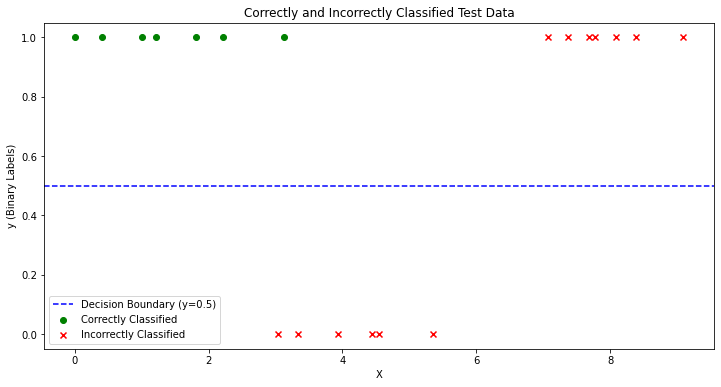

In [8]:
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 6))
plt.scatter(X_test[correct_indices], y_test[correct_indices], color='green', label='Correctly Classified', marker='o')
plt.scatter(X_test[incorrect_indices], y_test[incorrect_indices], color='red', label='Incorrectly Classified', marker='x')
plt.axhline(0.5, color='blue', linestyle='--', label='Decision Boundary (y=0.5)')
plt.title("Correctly and Incorrectly Classified Test Data")
plt.xlabel("X")
plt.ylabel("y (Binary Labels)")
plt.legend()
plt.show()

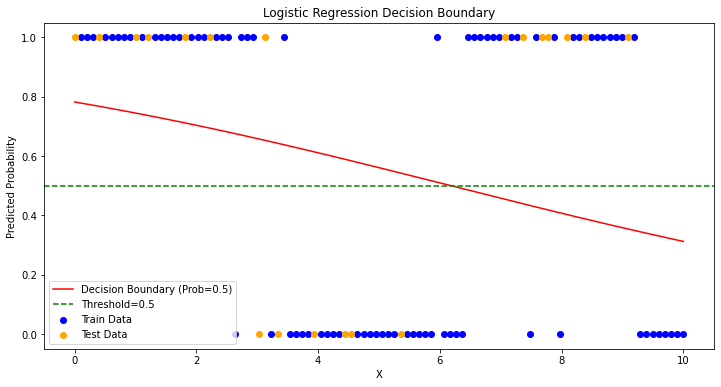

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_range, y_proba, color='red', label='Decision Boundary (Prob=0.5)')
plt.axhline(0.5, color='green', linestyle='--', label='Threshold=0.5')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("X")
plt.ylabel("Predicted Probability")
plt.legend()
plt.show()

**SVM**

In [43]:
#to be added

**K-means**

In [35]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
from sklearn.cluster import KMeans
inertia = []
for k in range (2,11):
    kmeans=KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

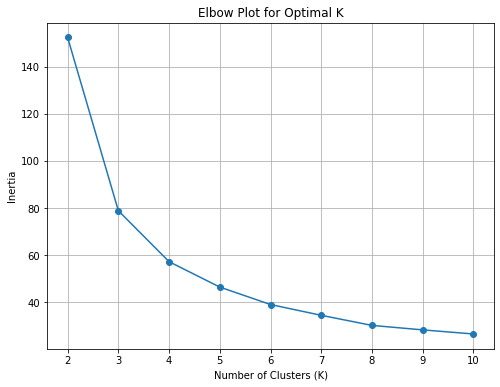

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(range(2,11), inertia, marker='o')
plt.title("Elbow Plot for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(range(2,11))
plt.grid(True)
plt.show()

In [38]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [39]:
iris_df['Cluster']=kmeans.fit_predict(iris_df)

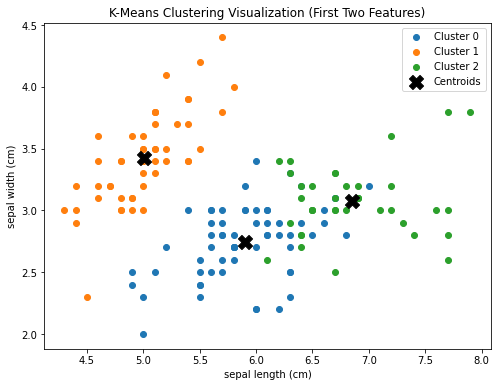

In [40]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(iris_df.loc[iris_df['Cluster'] == cluster, iris_df.columns[0]],
                iris_df.loc[iris_df['Cluster'] == cluster, iris_df.columns[1]],
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title("K-Means Clustering Visualization (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()

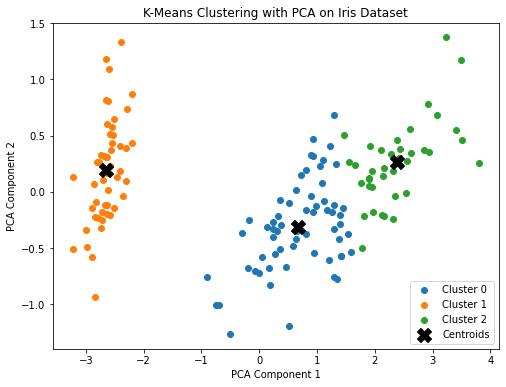

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df.iloc[:, :-3])
iris_df['PCA1'] = iris_pca[:, 0]
iris_df['PCA2'] = iris_pca[:, 1]

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(iris_df.loc[iris_df['Cluster'] == cluster, 'PCA1'],
                iris_df.loc[iris_df['Cluster'] == cluster, 'PCA2'],
                label=f'Cluster {cluster}')

centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title("K-Means Clustering with PCA on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

**K-modes**

In [44]:
#to be added